# **Padding and Strides**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---

#### MNIST Dataset

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/100 DAYS OF DL/Datasets/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [3]:
df.shape

(42000, 785)

# Without Padding

In [4]:
model = Sequential()

# 1st Layer (Convolution)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding= 'valid'))
# 2nd Layer (Convolution)
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'valid'))
# 3rd Layer (Convolution)
model.add(Conv2D(32, (3, 3), activation='relu', padding= 'valid'))
# 4th Layer (Flatten layer before Fully connected layers)
model.add(Flatten())
# 5th Layer (FC Layer)
model.add(Dense(128, activation='relu'))
# 6th Layer (Output Layer)
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

**Image size was `28*28`, then the feature maps' sizes reduce to `22*22` after 3 layers of convolution.**

# With Padding


1.   To reduce information loss during convolution
2.   To give all pixels equal importance



In [6]:
model1 = Sequential()

# 1st Layer (Convolution)
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding= 'same'))
# 2nd Layer (Convolution)
model1.add(Conv2D(32, (3, 3), activation='relu', padding= 'same'))
# 3rd Layer (Convolution)
model1.add(Conv2D(32, (3, 3), activation='relu', padding= 'same'))
# 4th Layer (Flatten layer before Fully connected layers)
model1.add(Flatten())
# 5th Layer (FC Layer)
model1.add(Dense(128, activation='relu'))
# 6th Layer (Output Layer)
model1.add(Dense(10, activation='softmax'))

In [7]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

**Image size was `28*28`, then the feature maps' sizes were `28*28` also after 3 layers of convolution.**

# Compilation and Training of both models

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
x = df.iloc[:,1:].values.reshape(42000,28,28,1)
y = df.iloc[:,0].values.reshape(42000,1)

In [11]:
start = time.time()
history = model.fit(x,y, epochs=100, validation_split=0.2,batch_size=128)
end= time.time()

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7774 - loss: 4.1910 - val_accuracy: 0.9702 - val_loss: 0.0953
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9838 - loss: 0.0521 - val_accuracy: 0.9777 - val_loss: 0.0715
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9804 - val_loss: 0.0707
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9761 - val_loss: 0.0846
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9820 - val_loss: 0.0776
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9983 - loss: 0.0055 - val_accuracy: 0.9783 - val_loss: 0.1019
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9963 - loss: 0.0103 - val_accuracy: 0.9760 - val_loss: 0.1189
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9957 - loss: 0.0131 - val_ac

In [12]:
start1 = time.time()
history1 = model1.fit(x,y, epochs=100, validation_split=0.2,batch_size=128)
end1= time.time()

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8322 - loss: 1.4360 - val_accuracy: 0.9752 - val_loss: 0.0810
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9847 - loss: 0.0471 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9933 - loss: 0.0225 - val_accuracy: 0.9825 - val_loss: 0.0678
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9783 - val_loss: 0.0840
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9962 - loss: 0.0130 - val_accuracy: 0.9808 - val_loss: 0.0846
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9800 - val_loss: 0.0868
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9786 - val_loss: 0.0978
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9972 - loss: 0.0087 - val

# Stride

1.   To take high level features only
2.   For faster computing



In [13]:
model2 = Sequential()

# 1st Layer (Convolution)
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding= 'same',strides = (2,2)))
# 2nd Layer (Convolution)
model2.add(Conv2D(32, (3, 3), activation='relu', padding= 'same',strides = (2,2)))
# 3rd Layer (Convolution)
model2.add(Conv2D(32, (3, 3), activation='relu', padding= 'same',strides = (2,2)))
# 4th Layer (Flatten layer before Fully connected layers)
model2.add(Flatten())
# 5th Layer (FC Layer)
model2.add(Dense(128, activation='relu'))
# 6th Layer (Output Layer)
model2.add(Dense(10, activation='softmax'))

In [14]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
start2 = time.time()
history2 = model2.fit(x,y, epochs=100, validation_split=0.2,batch_size=128)
end2 = time.time()

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7491 - loss: 1.1523 - val_accuracy: 0.9581 - val_loss: 0.1338
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9623 - loss: 0.1246 - val_accuracy: 0.9690 - val_loss: 0.1004
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9803 - loss: 0.0620 - val_accuracy: 0.9754 - val_loss: 0.0825
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9693 - val_loss: 0.1058
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9891 - loss: 0.0355 - val_accuracy: 0.9750 - val_loss: 0.0905
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9788 - val_loss: 0.0778
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9737 - val_loss: 0.1089
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0241 - val_acc

# Validation

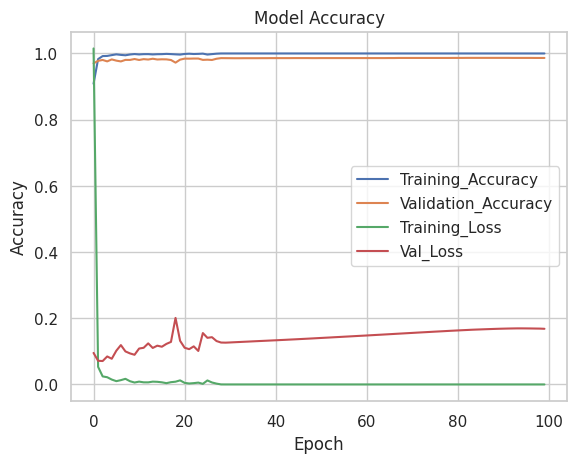

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training_Accuracy', 'Validation_Accuracy','Training_Loss','Val_Loss'], loc='right')

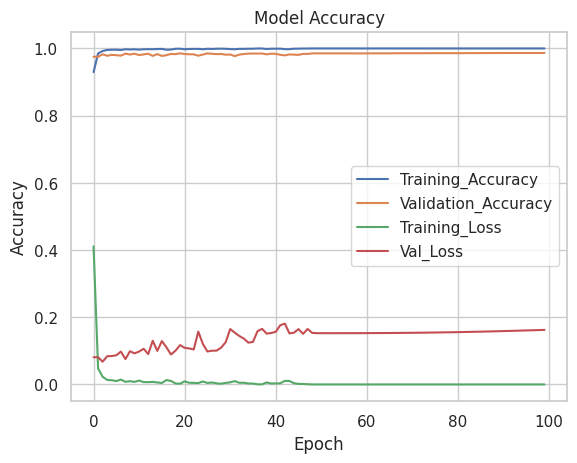

In [18]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training_Accuracy', 'Validation_Accuracy','Training_Loss','Val_Loss'], loc='right')

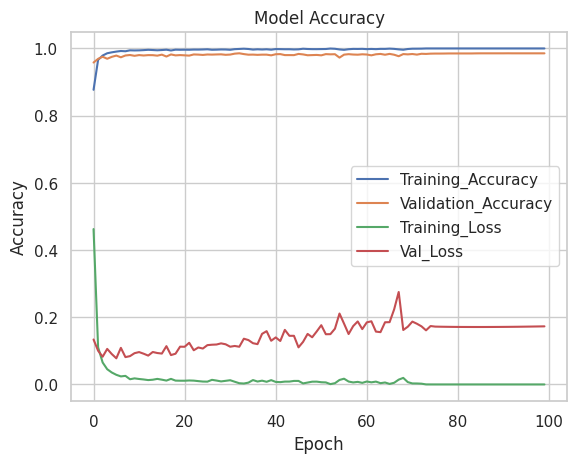

In [19]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training_Accuracy', 'Validation_Accuracy','Training_Loss','Val_Loss'], loc='right')

<Axes: >

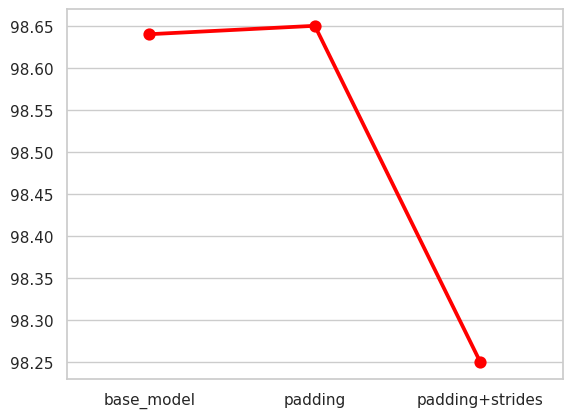

In [27]:
sns.pointplot(y = np.array([0.9864,0.9865,0.9825])*100,x=['base_model','padding','padding+strides'],color='red')

# Time

In [20]:
time_for_1st_model=end-start
time_for_2nd_model=end1-start1
time_for_3rd_model=end2-start2

<Axes: >

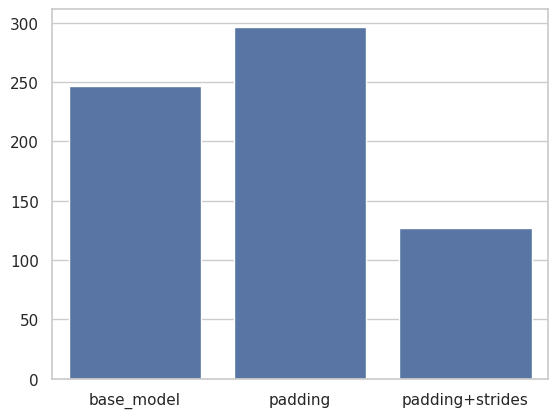

In [28]:
sns.barplot(x=['base_model','padding','padding+strides'],y=[time_for_1st_model,time_for_2nd_model,time_for_3rd_model])